In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [127]:
file_path = '/content/drive/MyDrive/EDA Projects/FREECODECAMP_Data_Analysis_Projects/medical_examination.csv'
df = pd.read_csv(file_path)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [129]:
# Calculating the BMI by dividing their weight in kilograms by the square of their height in meters.

bmi = df['weight']/((df['height']/100)**2)

# If BMI value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = bmi.apply(lambda x: 1 if x > 25 else 0)

In [130]:
# Normalize the Cholesterol and gluc column data by making 0 always good and 1 always bad. 

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

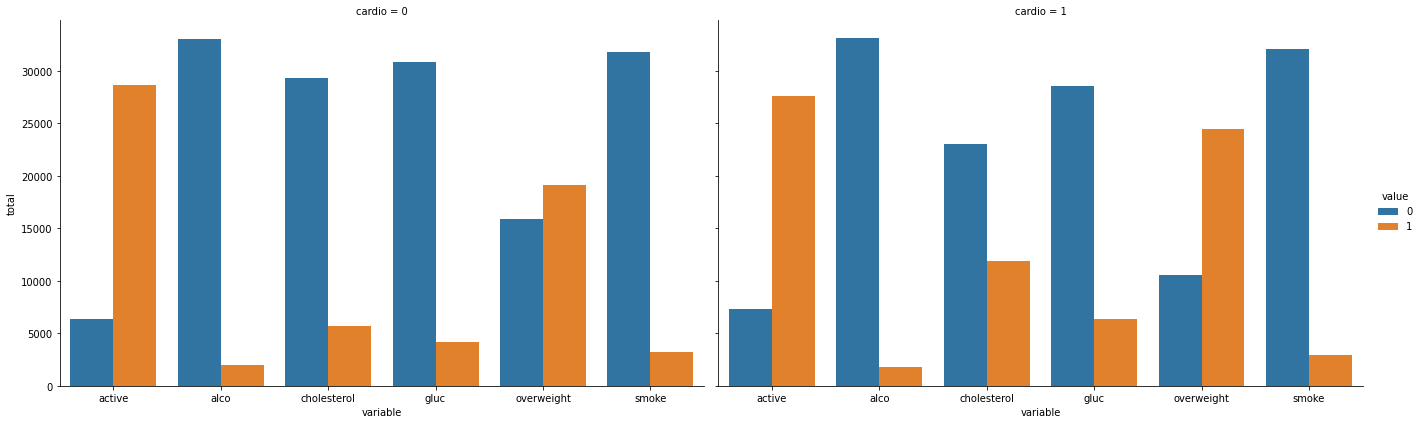

In [131]:
# Draw Categorical Plot

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat['total'] = 1
df_cat = df_cat.groupby(['variable', 'value', 'cardio'], as_index=False).count()

# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data = df_cat, x ="variable", y ="total", col ="cardio", kind ="bar", hue = "value", height=6, aspect=8/5).fig


# Do not modify the next two lines
fig.savefig('catplot.png')


In [132]:
#creating a copy for further cleaning and modification
draw_heat_df = df.copy()
draw_heat_df.shape

In [133]:
# Cleaning the invalid data and Keeping the correct data with diastolic pressure is higher than systolic with respect to there individual column values

draw_heat_df = draw_heat_df.loc[(draw_heat_df['ap_lo'] <= draw_heat_df['ap_hi'])]
draw_heat_df.shape

(68766, 14)

In [134]:
# Cleaning Invalid Data in height column. 
#Keeping only Height value which is less than the 2.5th percentile and more than 97.5th percentile of the individual height value in the column

draw_heat_df = draw_heat_df.loc[(draw_heat_df['height'] >= draw_heat_df['height'].quantile(0.025)) & (draw_heat_df['height'] <= draw_heat_df['height'].quantile(0.975))]
draw_heat_df.shape

(65859, 14)

In [135]:
# Cleaning Invalid Data in weight column. 
# Keeping only Height value which is less than the 2.5th percentile and more than 97.5th percentile of the individual height value in the column.

draw_heat_df = draw_heat_df.loc[(draw_heat_df['weight'] >= draw_heat_df['weight'].quantile(0.025)) & (draw_heat_df['weight'] <= draw_heat_df['weight'].quantile(0.975))]
draw_heat_df.shape

(62784, 14)

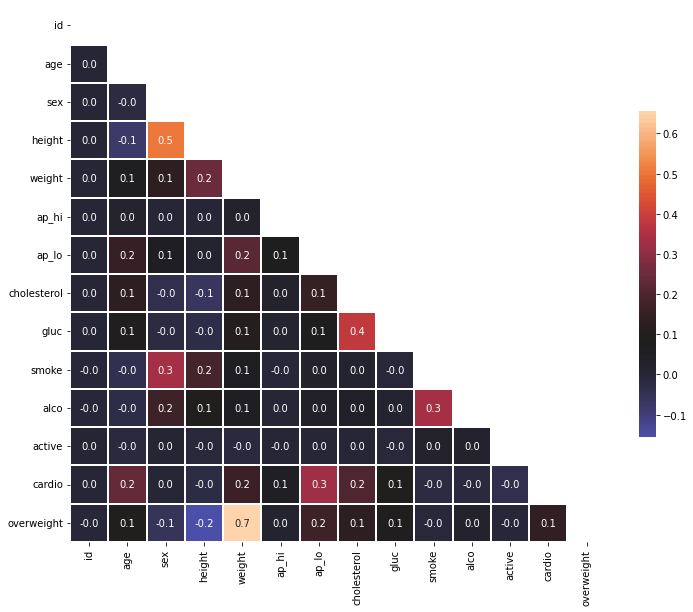

In [136]:
# Calculate the correlation matrix
corr = draw_heat_df.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, center=0.08, annot=True , fmt='.1f', linewidths=1, cbar_kws= {"shrink":0.5},square=True, mask = mask)

# Do not modify the next two lines
fig.savefig('heatmap.png')
